In [1]:

import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
# import datetime
# from dateutil.relativedelta import relativedelta
# from datetime import datetime
# import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
# from osgeo import gdal
# import geopandas as gpd
# from shapely.geometry import MultiPolygon, Polygon, Point
# from scipy import io
import pandas as pd

from datetime import date
from datetime import timedelta
import datetime

#reference grid
f = 0

file = 'Class_data.nc'





fhadj = Dataset(file, mode='r')
variable_data_A = fhadj.variables['A'][:]
variable_data_B = fhadj.variables['B'][:]
variable_data_C = fhadj.variables['C'][:]
variable_data_D = fhadj.variables['D'][:]
variable_data_E = fhadj.variables['E'][:]
variable_data_F = fhadj.variables['F'][:]
print(fhadj.variables.keys())

fhadj.close()




dict_keys(['time', 'A', 'B', 'C', 'D', 'E', 'F'])


In [2]:
import numpy as np

# Sample data for array A (replace with your actual data)
A = variable_data_A

# Create the XXY array
XXY = np.where(A > 0, 1, 0)

print(XXY)



var_D = np.where(variable_data_D > 0, 1, 0)

print(var_D)

[1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

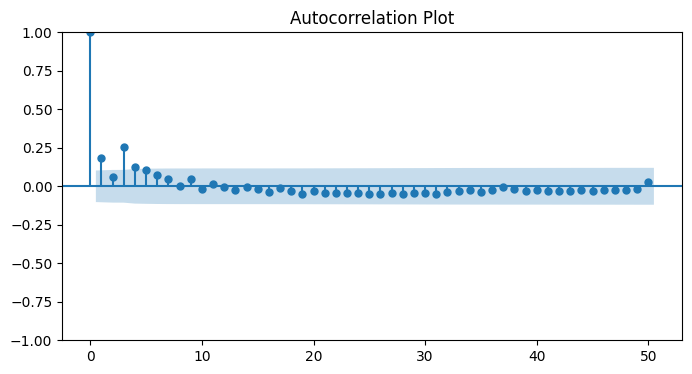

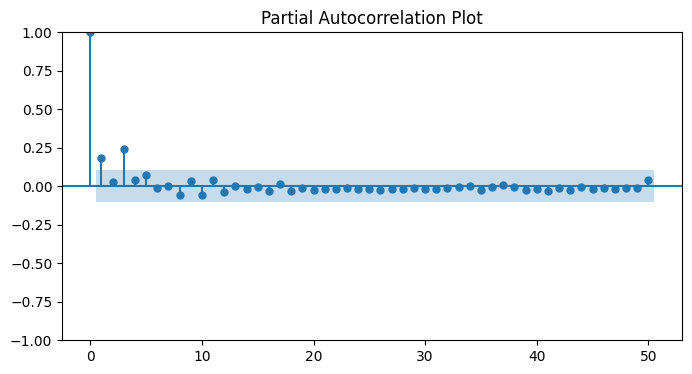

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample time series data (replace with your own data)
data = variable_data_A

# Create autocorrelation plot
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
sm.graphics.tsa.plot_acf(data, lags=50, ax=ax1)
ax1.set_title('Autocorrelation Plot')

# Create partial autocorrelation plot
fig, ax2 = plt.subplots(1, 1, figsize=(8, 4))
sm.graphics.tsa.plot_pacf(data, lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Plot')

plt.show()


In [4]:
import statsmodels.api as sm
import pandas as pd

# Sample time series data (replace with your own data)
data = variable_data_A

# Convert data to a pandas Series
time_series = variable_data_A

# Perform the Augmented Dickey-Fuller test with trend
adf_test_with_trend = sm.tsa.adfuller(time_series, regression='ct')

# Perform the Augmented Dickey-Fuller test with only constant
adf_test_with_constant = sm.tsa.adfuller(time_series, regression='c')

# Display the test statistics for residuals and trend
print("ADF Test Statistics (with trend):")
print(f"ADF Statistic: {adf_test_with_trend[0]}")
print(f"P-value: {adf_test_with_trend[1]}")
print(f"Lags Used: {adf_test_with_trend[2]}")
print(f"Number of Observations: {adf_test_with_trend[3]}")
print("Critical Values:")
for key, value in adf_test_with_trend[4].items():
    print(f"{key}: {value}")

print("\nADF Test Statistics (with constant):")
print(f"ADF Statistic: {adf_test_with_constant[0]}")
print(f"P-value: {adf_test_with_constant[1]}")
print(f"Lags Used: {adf_test_with_constant[2]}")
print(f"Number of Observations: {adf_test_with_constant[3]}")
print("Critical Values:")
for key, value in adf_test_with_constant[4].items():
    print(f"{key}: {value}")


ADF Test Statistics (with trend):
ADF Statistic: -7.831335862375576
P-value: 1.75355612653178e-10
Lags Used: 2
Number of Observations: 362
Critical Values:
1%: -3.9839983263172876
5%: -3.4226880872267436
10%: -3.1342229649827877

ADF Test Statistics (with constant):
ADF Statistic: -7.78155524128868
P-value: 8.390955199385318e-12
Lags Used: 2
Number of Observations: 362
Critical Values:
1%: -3.448544133483233
5%: -2.8695574079525565
10%: -2.5710411593052713


In [5]:
from sklearn.model_selection import train_test_split

# Sample data for column A (replace with your actual data)
data_A = variable_data_A

# Split the data into training and testing sets (85:15 split)
train_data, test_data = train_test_split(data_A, test_size=0.15, random_state=42)

print("Training Data (85%):", train_data)
print("Testing Data (15%):", test_data)


Training Data (85%): [0.00000000e+00 4.56902623e-01 2.54796036e-02 1.12178601e-01
 5.20301759e-01 3.79425585e-02 3.37589550e+00 2.99386501e-01
 1.19468898e-01 6.00962102e-01 0.00000000e+00 7.30271435e+00
 0.00000000e+00 1.60345286e-01 3.52917314e-02 1.22662330e+00
 0.00000000e+00 0.00000000e+00 1.70724243e-02 0.00000000e+00
 6.25521123e-01 0.00000000e+00 1.03196176e-03 8.56941509e+00
 2.10628062e-01 5.09526755e-04 0.00000000e+00 1.36337831e-05
 9.81246293e-01 2.67579444e-02 0.00000000e+00 7.94029236e-02
 0.00000000e+00 1.68159199e+00 2.74451394e-02 0.00000000e+00
 4.68901964e-03 9.41867847e-03 6.30776808e-02 5.39420586e+01
 5.58706236e+00 0.00000000e+00 4.70295525e+01 0.00000000e+00
 1.66982591e+00 5.63824177e+00 0.00000000e+00 3.42256584e+01
 1.07907581e+00 1.34281486e-01 2.80872099e-02 1.09772488e-01
 1.78634441e+00 4.25368920e-03 2.83383703e+00 5.87076247e-01
 5.79943180e+00 6.58727586e-02 2.79505491e+00 4.24099386e-01
 2.39274693e+00 3.25581878e-02 1.24243011e+01 8.47633783e-05
 4.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44352D+00    |proj g|=  7.41737D-02

At iterate    5    f=  4.39484D+00    |proj g|=  1.45337D-02

At iterate   10    f=  4.28812D+00    |proj g|=  9.60787D-03

At iterate   15    f=  4.28674D+00    |proj g|=  8.89657D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.918D-05   4.287D+00
  F =   4.2866390109965566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


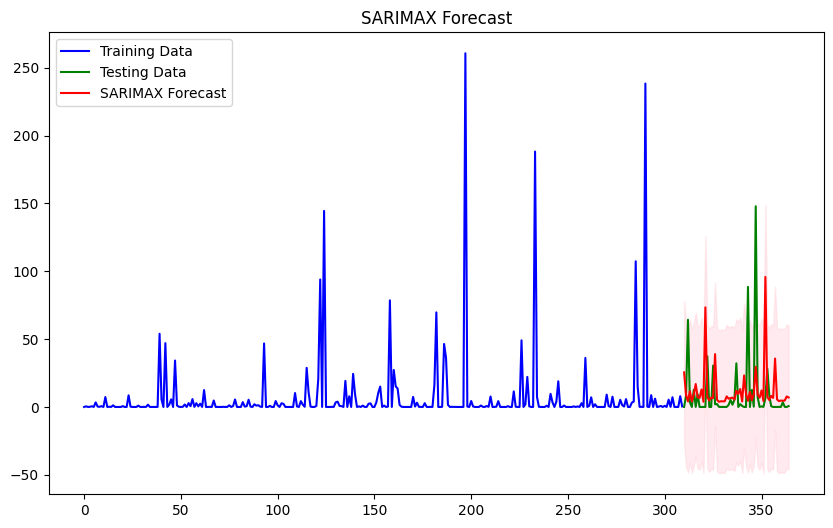

Mean Squared Error (MSE): 838.1193888916949


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 31)  # (P, D, Q, s)

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=None)
results = model.fit()

# Predict using the SARIMAX model
n_forecast = len(test_data)
forecast = results.get_forecast(steps=n_forecast)

# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
ci = forecast.conf_int()

# Create an array of indices for the testing data
test_data_indices = np.arange(len(train_data), len(train_data) + n_forecast)

# Plot the observed and predicted data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data_indices, test_data, label='Testing Data', color='green')
plt.plot(test_data_indices, predicted_values, label='SARIMAX Forecast', color='red')
plt.fill_between(test_data_indices, ci[:, 0], ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

# Calculate and print the Mean Squared Error (MSE) to evaluate the model's performance
mse = ((test_data - predicted_values) ** 2).mean()
print(f'Mean Squared Error (MSE): {mse}')

In [11]:
import pandas as pd

# Sample data (replace with your actual time series data)
data = {
    'A': variable_data_A,
    'B': variable_data_B,
    'C': variable_data_C,
    'D': variable_data_D,
    'E': variable_data_E,
    'F': variable_data_F
}

df = pd.DataFrame(data)

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr('kendall')

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


import numpy as np

correlation_matrix =correlation_matrix[np.abs(correlation_matrix) > 0.5]

print(correlation_matrix)

Correlation Matrix:
          A         B         C         D         E         F
A  1.000000  0.038927 -0.069099 -0.037871  0.076266  0.016815
B  0.038927  1.000000 -0.043742 -0.132970  0.071206  0.058185
C -0.069099 -0.043742  1.000000 -0.011749 -0.067758  0.052484
D -0.037871 -0.132970 -0.011749  1.000000 -0.097672  0.077510
E  0.076266  0.071206 -0.067758 -0.097672  1.000000 -0.058952
F  0.016815  0.058185  0.052484  0.077510 -0.058952  1.000000
     A    B    C    D    E    F
A  1.0  NaN  NaN  NaN  NaN  NaN
B  NaN  1.0  NaN  NaN  NaN  NaN
C  NaN  NaN  1.0  NaN  NaN  NaN
D  NaN  NaN  NaN  1.0  NaN  NaN
E  NaN  NaN  NaN  NaN  1.0  NaN
F  NaN  NaN  NaN  NaN  NaN  1.0


     A    B    C    D    E    F
A  1.0  NaN  NaN  NaN  NaN  NaN
B  NaN  1.0  NaN  NaN  NaN  NaN
C  NaN  NaN  1.0  NaN  NaN  NaN
D  NaN  NaN  NaN  1.0  NaN  NaN
E  NaN  NaN  NaN  NaN  1.0  NaN
F  NaN  NaN  NaN  NaN  NaN  1.0
